In [50]:
import numpy as np
import pylab as pl
import matplotlib as plt

import pandas as pd
import os
import json
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'plt', 'array']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
swipes = np.load("MTA_Fare.npy")
swipes = swipes.astype(float)
swipes[swipes == -1] = np.nan

# Task 1

In [3]:
weekly = swipes.reshape((600*23,194))

In [4]:
weekly_pd = pd.DataFrame(weekly)

In [5]:
weekly_pd = weekly_pd.sum(skipna=True)

In [6]:
weekly_pd[weekly_pd <= weekly_pd.mean() - 3*weekly_pd.std()]

126    5218686.0
dtype: float64

This is the week of hurricane sandy - 10/19-10/26. Sandy happened on the 23rd. It makes sense to see a dramatic reduction in trips taken, given the state of the subways and the disruption to people's lives.

# Task 2

In [7]:
types_over_time = np.nansum(swipes, axis=0)

In [8]:
types_over_time.shape

(23, 194)

In [9]:
types_over_time_df = pd.DataFrame(types_over_time)

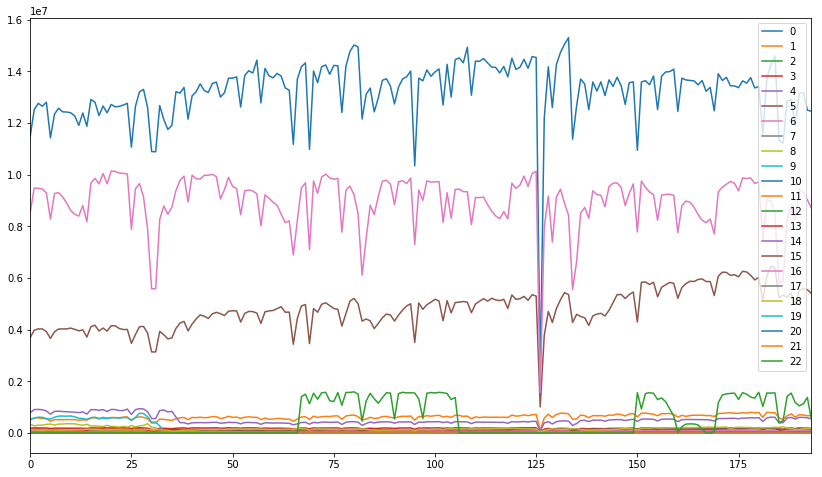

In [10]:
types_over_time_df.transpose().plot(figsize=(14,8))

In [11]:
first_ten = types_over_time_df.ix[:,0:9]
last_ten = types_over_time_df.ix[:,184:193]

In [30]:
last_ten.head()

,184,185,186,187,188,189,190,191,192,193
0,14604028.0,11344945.0,11223430.0,12864865.0,12904811.0,11932970.0,13139360.0,13189610.0,12500756.0,12459947.0
1,781529.0,596341.0,518956.0,664531.0,744990.0,613294.0,713717.0,695134.0,670228.0,679497.0
2,62658.0,50820.0,45153.0,56129.0,60429.0,51664.0,57208.0,58771.0,56525.0,55192.0
3,193268.0,164607.0,148652.0,177885.0,193547.0,168932.0,189564.0,184239.0,180029.0,179363.0
4,56671.0,22623.0,25301.0,67713.0,64867.0,43426.0,47804.0,61101.0,59400.0,46859.0


In [12]:
rides_per_group_last_ten = last_ten.sum(axis=1)
rides_per_group_first = first_ten.sum(axis=1)

In [27]:
rides_per_group_first

0     123473261.0
1       5333762.0
2        498989.0
3       1906275.0
4        479562.0
5      39343036.0
6      91175712.0
7        109813.0
8       3274997.0
9       5992187.0
10       412549.0
11      1318897.0
12           58.0
13      1372964.0
14      8440283.0
15       645160.0
16       312086.0
17         4540.0
18      1208606.0
19       211311.0
20        66263.0
21         4762.0
22            0.0
dtype: float64

In [28]:
rides_per_group_first.sum()

285585073.0

In [13]:
usage_ratio_first = rides_per_group_first / rides_per_group_first.sum()

In [14]:
usage_ratio_last = rides_per_group_last_ten / rides_per_group_last_ten.sum()

In [15]:
change = usage_ratio_last - usage_ratio_first

In [16]:
change.ix[:].sort(ascending = False)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [17]:
change*100

5     4.586355
22    3.588576
12    0.482757
1     0.375146
15    0.335909
18    0.198741
16    0.195657
17    0.105418
11    0.075700
2     0.011514
21    0.000991
4    -0.001425
19   -0.001494
20   -0.005198
10   -0.031012
7    -0.038444
3    -0.069675
13   -0.213909
0    -0.864123
14   -1.114069
8    -1.146756
9    -2.098211
6    -4.372448
dtype: float64

**Between 2010 to 2014:**

7 day passes have increased in usage share by ~4.6%, and student passes have increased in usage share by ~3.6%.

ADA passes have decreased in usage share by ~4.4%, and EZPay passes have decreased in usage share by 2.1%

In [52]:
sm.tsa.adfuller(types_over_time[6])
sm.tsa.adfuller(types_over_time[6])


(-9.5450799172473175,
 2.6626428252492118e-16,
 0,
 193,
 {'1%': -3.4646940755442612,
  '10%': -2.5748163958763994,
  '5%': -2.8766348847254934},
 5433.8496725031864)

# Task 3

In [18]:
stations = pd.DataFrame(np.nansum(swipes,axis=1))

In [19]:
stations.ix[0,:]

0      126878.0
1      149477.0
2      152383.0
3      160175.0
4      162641.0
5      156414.0
6      159156.0
7      159374.0
8      163285.0
9      159252.0
10     161573.0
11     157472.0
12     140267.0
13     146508.0
14     134336.0
15     140549.0
16     132170.0
17     126177.0
18     128274.0
19     131653.0
20     125115.0
21     128307.0
22     120711.0
23     123919.0
24     127016.0
25     109412.0
26     130172.0
27     130818.0
28     126172.0
29     115889.0
         ...   
164    133877.0
165    106029.0
166    109520.0
167    101694.0
168     97289.0
169     85385.0
170     91152.0
171     78611.0
172     93906.0
173     72400.0
174     86888.0
175     94569.0
176     91569.0
177     92180.0
178     89959.0
179     85529.0
180     85204.0
181     77550.0
182     86791.0
183     90922.0
184     87973.0
185     83825.0
186     91001.0
187     80908.0
188     79891.0
189     69881.0
190     79550.0
191     78901.0
192     74591.0
193     76833.0
Name: 0, dtype: float64

In [20]:
sample_rate = 1 #samples per week
duration = 194.0 #weeks
N = int(duration * sample_rate)

Text(0.5,1,'MTA Swipe Power Spectrum')

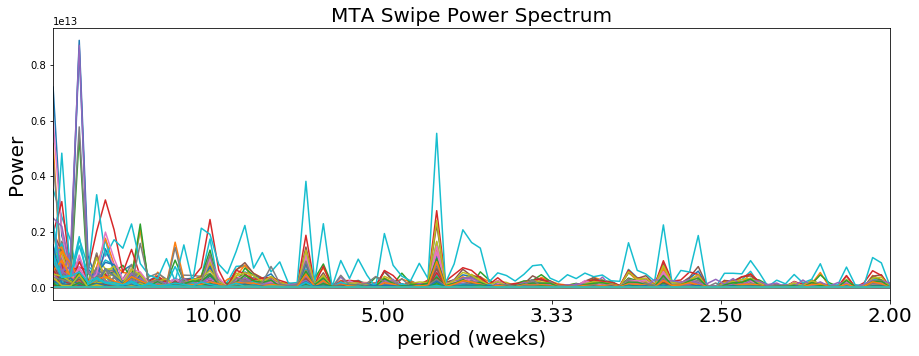

In [36]:

fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
for i in range(0,600):
    f = np.abs(np.fft.rfft(stations.ix[i,:]))**2
    #ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xlim(1/194,1/2)
ax.set_xticklabels([ "%.2f"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (weeks)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("MTA Swipe Power Spectrum", fontsize=20)

Text(0.5,1,'MTA Swipe Power Spectrum')

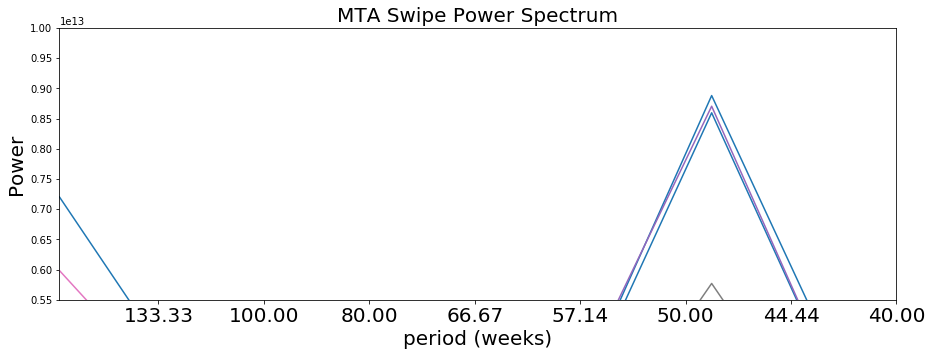

In [55]:
array = []
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
for i in range(0,600):
    f = np.abs(np.fft.rfft(stations.ix[i,:]))**2
    #ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    if f[4] > .55e13:
        array.append(i)
ax.set_xlim(1/194,1/40)
ax.set_ylim(.55e13,1e13)
ax.set_xticklabels([ "%.2f"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (weeks)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("MTA Swipe Power Spectrum", fontsize=20)

In [57]:
print("These stations have the highest annual periodicity:")
print(array)

These stations have the highest annual periodicity:
[0, 150, 194, 327]
